<a href="https://colab.research.google.com/github/SaakshiNarula/Shopify-assignment/blob/master/Shopify_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**QUESTION 1**

In [76]:
import pandas as pd
df = pd.read_csv('/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [77]:
df['order_amount'].mean()               

3145.128

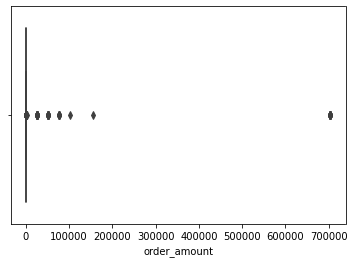

In [78]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.boxplot(df["order_amount"])         #mean for order_amount

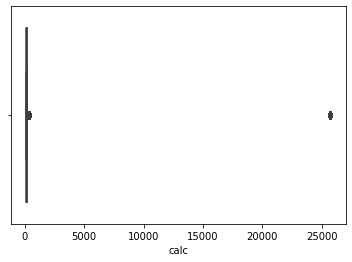

In [79]:
df['calc'] = df['order_amount']/df['total_items']
sns.boxplot(df["calc"])                  #the outlier here is the $51450 for 2 pairs as I describe below

**1a)**  By analysing the data, I found that 'order amount' is the product of the cost (per pair of sneakers)*(number of pairs purchased). Using that information, the AOV is found by taking an average of 'order amount'. The fault in such a calculation is that it gives equal weight to all the sneakers sold. But when the data distribution is analysed using a boxplot, it is evident that there are outliers in the data and I found 51450 for 2pairs of sneakers, and 704000 for 2000 pairs a lot of times in the data. The 704000 is valid since, for each pair that would be a total of 352 which is reasonable.(However in the current calculation of mean, this is an outlier. A weighted mean calculation would solve this since it would account for thr 2000pairs and assign 704000 a weight accordingly). The $51450 for 2 pairs of sneaker seems to be a data entry error and I would proceed by eliminating that from the calulation of our mean.

In [80]:
df = df[df.order_amount != 51450]             #removing outlier. note again that $704000 is not an outlier

In [81]:
df['calc'] = df['order_amount']/df['total_items']
df['calc'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


306.403290529695

**1b)** Hence my suggested metric would be to 1)Remove the real outliers from the data (here 51450) and 2) use a WEIGHTED MEAN (which would avoid 704000 from being treated as an outlier) 



**1c)** The value would be 306.403 dollars per pair on average

**QUESTION 2**


**2a)**

In [75]:
SELECT COUNT(*)
FROM Orders, Shippers
WHERE Orders.ShipperId = Shippers.ShipperId AND ShipperName = "Speedy Express";

Answer -54

**2b)**

In [ ]:
SELECT [Employees].LastName, COUNT(*) AS ord
FROM [Orders]
JOIN [Employees]
ON [Orders].EmployeeID = [Employees].EmployeeID
GROUP BY [Employees].LastName
ORDER BY ord DESC
LIMIT 1

Answer - Peacock

**2c)**

In [ ]:
SELECT Orders.OrderID,
    Customers.Country
FROM Orders
JOIN Customers
    ON Customers.CustomerID = Orders.CustomerID
WHERE Customers.Country= "Germany";

SELECT Customers.Country,
    OrderDetails.ProductID,
    SUM(OrderDetails.Quantity) AS "Max"
FROM Orders
JOIN Customers
    ON Customers.CustomerID = Orders.CustomerID
JOIN OrderDetails
    ON OrderDetails.OrderID = Orders.OrderID
WHERE Customers.Country = 'Germany'
GROUP BY OrderDetails.ProductID
ORDER BY Max DESC
Limit 1;

Product 40 was the maximum ordered with a quantity of 160